In [84]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [85]:
nhanes = pd.read_csv('nhanes_data.csv')
nhanes.head()

,Unnamed: 0,ID,Albumin,Blood_Urea_Nitrogen,Creatinine,C_Reactive_Protein,Glucose,Glycohemoglobin,Total_Cholesterol,Uric_Acid,White_Blood_Cell_Count,Lymphocyte_Percent,Mean_Cell_Volume,Red_Cell_Distribution_Width,Systolic_Blood_Pressure,Age,Gender
0,1,93705.0,4.4,11,0.92,2.72,85,6.2,157,5.8,8.6,40.0,67.0,15.6,200.000000,66,Female
1,2,93706.0,4.4,12,0.81,0.74,94,5.2,149,8.0,6.1,24.6,89.7,12.2,111.333333,18,Male
2,3,93707.0,5.2,17,0.64,0.32,115,5.6,199,5.5,11.2,37.1,83.9,13.6,128.000000,13,Male
3,4,93708.0,3.9,16,0.58,1.83,116,6.2,210,4.5,6.0,31.3,86.8,13.4,142.000000,66,Female
4,5,93709.0,3.7,20,1.32,6.94,96,6.3,180,6.2,7.2,25.8,88.8,15.7,118.666667,75,Female


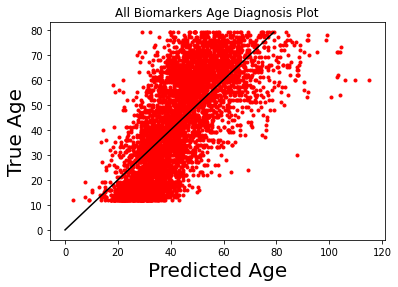

All Biomarkers Age Accuracy: 64.27 %.
All Biomarkers Age MSE:
192.42622659734778


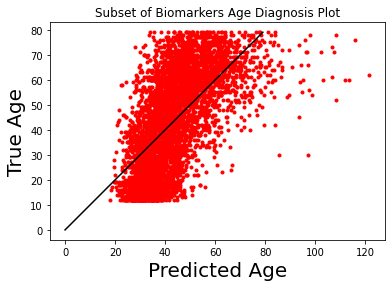

Subset of Biomarkers Age Accuracy: 58.52 %.
Subset of Biomarkers Age MSE:
231.2327403623459


LinearRegression()

In [88]:
def run_age_regression(df, X, regression_name):
    y = df['Age']
    
    # Normalize values of X
    X = MinMaxScaler().fit_transform(X)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    y_pred = reg.predict(X)
    
    # Diagnosis plot
    plt.plot(reg.predict(X), y, '.r')
    plt.plot([0, max(y)], [0, max(y)], 'k')
    plt.xlabel('Predicted Age', size = 20)
    plt.ylabel('True Age', size = 20)
    plt.title(regression_name + ' Diagnosis Plot')
    plt.show()
    
    # Calculate the absolute errors
    errors = abs(y_pred - y)
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print(regression_name + ' Accuracy:', round(accuracy, 2), '%.')
    
    # Calculate mean squared error
    mse = np.mean((y - y_pred)**2)
    print(regression_name + ' MSE:')
    print(mse)
    
    return reg

X_full = nhanes[['Blood_Urea_Nitrogen', 'Creatinine', 'C_Reactive_Protein', 'Glucose', 
            'Glycohemoglobin', 'Total_Cholesterol', 'Uric_Acid', 'White_Blood_Cell_Count', 'Lymphocyte_Percent', 
            'Mean_Cell_Volume', 'Red_Cell_Distribution_Width', 'Systolic_Blood_Pressure']]
X_subset = nhanes[['Blood_Urea_Nitrogen', 'Glucose', 'Glycohemoglobin', 'Systolic_Blood_Pressure']]
run_age_regression(nhanes, X_full, 'All Biomarkers Age')
run_age_regression(nhanes, X_subset, 'Subset of Biomarkers Age')
